### Uwaga na wstępie - ja tego notatnika używam w środowisku z Pythonem 3.10.18.  Kiedy próbowałem importować tensorflow w pythonie 3.12, to były jakieś dziwne zjawiska.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

from sklearn.model_selection import train_test_split

## Model z wektorami z all-mpnet-base-v2 na wszystkich tekstach (5;50] słów (w tym 'titles' z ISOT!)

In [2]:
import pickle
# Load back from pickle
with open("50_words_embeddings_all-mpnet-base-v2.pkl", "rb") as f:
    loaded_data = pickle.load(f)

X = loaded_data['embeddings']   # embeddings
y = loaded_data['fake']       # labels

In [5]:
X

array([[-0.02135707,  0.10712832,  0.02475127, ..., -0.10187449,
         0.01403639, -0.04594311],
       [ 0.04982228,  0.16008723,  0.10655096, ..., -0.0061774 ,
         0.07947188,  0.04331834],
       [-0.00927131,  0.13590144,  0.15430851, ..., -0.01284456,
        -0.00431354,  0.00274036],
       ...,
       [-0.10220884,  0.10881556,  0.03969587, ..., -0.01717857,
         0.09211893, -0.01644594],
       [ 0.08126641,  0.13156463,  0.04447271, ..., -0.01151659,
         0.02255928,  0.05286819],
       [-0.20417652,  0.16614574,  0.08577016, ..., -0.04412331,
         0.04165743, -0.1095911 ]], shape=(68395, 768), dtype=float32)

In [4]:
X.shape

(68395, 768)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
model = keras.Sequential([
        layers.Input(shape=(768,)),       # (384 lub 768)
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(1, activation="sigmoid")   # binary classification
    ])

optimizer = keras.optimizers.Adam(learning_rate=1e-4) # 0.0001

model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7649 - loss: 0.4764 - val_accuracy: 0.7975 - val_loss: 0.4218
Epoch 2/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8049 - loss: 0.4086 - val_accuracy: 0.8124 - val_loss: 0.3922
Epoch 3/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8220 - loss: 0.3773 - val_accuracy: 0.8183 - val_loss: 0.3774
Epoch 4/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8365 - loss: 0.3518 - val_accuracy: 0.8229 - val_loss: 0.3663
Epoch 5/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8491 - loss: 0.3313 - val_accuracy: 0.8273 - val_loss: 0.3639
Epoch 6/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8602 - loss: 0.3098 - val_accuracy: 0.8284 - val_loss: 0.3625
Epoch 7/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8710 - loss: 0.2910 - val_accuracy: 0.8312 - val_loss: 0.3659
Epoch 8/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8817 - loss: 0.2721 - 

<Axes: >

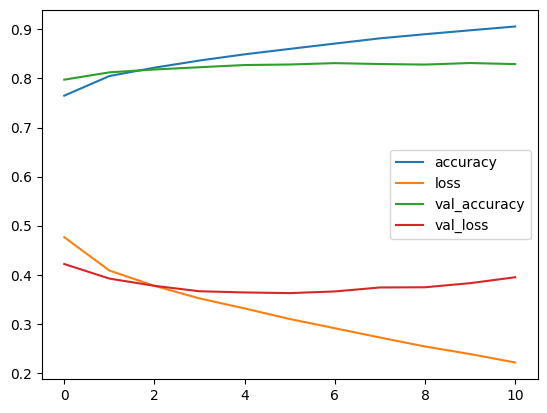

In [5]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [8]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")  # nasza interpretacja  --->  0/1


accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
precision = precision_score(y_test, y_pred)
print('Precision', precision)

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.8284231303457855
Precision 0.8296217205613179
Confusion matrix:
[[5893 1117]
 [1230 5439]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      7010
           1       0.83      0.82      0.82      6669

    accuracy                           0.83     13679
   macro avg       0.83      0.83      0.83     13679
weighted avg       0.83      0.83      0.83     13679



#### przygotowane na boku wektory z "validation set" od chata GPT:

##### Chat GPT RESEARCHED dataset (najlepszy, jaki dotąd udało mi się wydobyć z chata):

In [24]:
import pickle
# Load back from pickle
with open("ChatGPT_researched_200_embeddings_all-mpnet-base-v2.pkl", "rb") as f:
    loaded_data = pickle.load(f)

X_chat = loaded_data['embeddings']   # embeddings
y_chat = loaded_data['fake']       # labels

Metryki, ale już z ustalonym wcześniej thresholdem 0.65

In [30]:
y_pred_probs = model.predict(X_chat)
y_pred = (y_pred_probs > 0.65).astype("int32")


accuracy = accuracy_score(y_chat, y_pred)
print('Accuracy:', accuracy)
precision = precision_score(y_chat, y_pred)
print('Precision', precision)

print('Confusion matrix:')
print(confusion_matrix(y_chat, y_pred))

print(classification_report(y_chat,y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 0.7732558139534884
Precision 0.7402597402597403
Confusion matrix:
[[76 20]
 [19 57]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        96
           1       0.74      0.75      0.75        76

    accuracy                           0.77       172
   macro avg       0.77      0.77      0.77       172
weighted avg       0.77      0.77      0.77       172



#### Poniżej graficzne potwierdzenie, że threshold około 0.65 jest OK:

In [26]:
probs_vs_labels = pd.DataFrame({'proba':y_pred_probs[:,0], 'real_label':y_chat})

<Axes: xlabel='proba', ylabel='Count'>

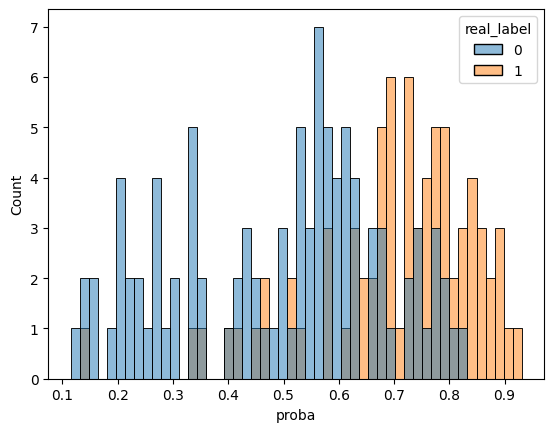

In [27]:
sns.histplot(data=probs_vs_labels, x='proba', hue='real_label', bins=50)

<Axes: xlabel='proba', ylabel='Density'>

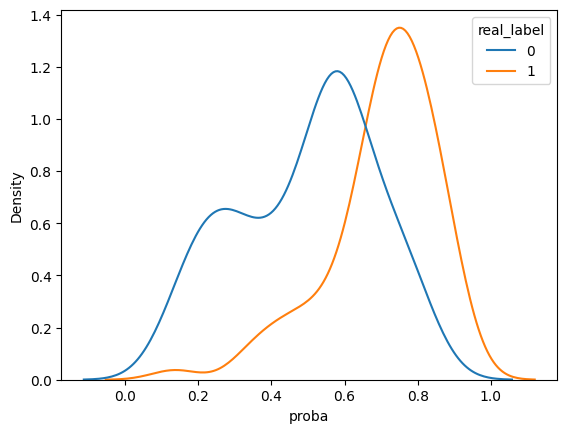

In [31]:
sns.kdeplot(data=probs_vs_labels, x='proba', hue='real_label')

### KLOD validation1 (200) - niezbalansowany

In [32]:
import pickle
# Load back from pickle
with open("KLOD_validation_200_embeddings_all-mpnet-base-v2.pkl", "rb") as f:
    loaded_data = pickle.load(f)

X_chat = loaded_data['embeddings']   # embeddings
y_chat = loaded_data['fake']       # labels

In [36]:
y_pred_probs = model.predict(X_chat)
y_pred = (y_pred_probs > 0.5).astype("int32")


accuracy = accuracy_score(y_chat, y_pred)
print('Accuracy:', accuracy)
precision = precision_score(y_chat, y_pred)
print('Precision', precision)

print('Confusion matrix:')
print(confusion_matrix(y_chat, y_pred))

print(classification_report(y_chat,y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.7202380952380952
Precision 0.784
Confusion matrix:
[[23 27]
 [20 98]]
              precision    recall  f1-score   support

           0       0.53      0.46      0.49        50
           1       0.78      0.83      0.81       118

    accuracy                           0.72       168
   macro avg       0.66      0.65      0.65       168
weighted avg       0.71      0.72      0.71       168



In [37]:
probs_vs_labels = pd.DataFrame({'proba':y_pred_probs[:,0], 'real_label':y_chat})

<Axes: xlabel='proba', ylabel='Count'>

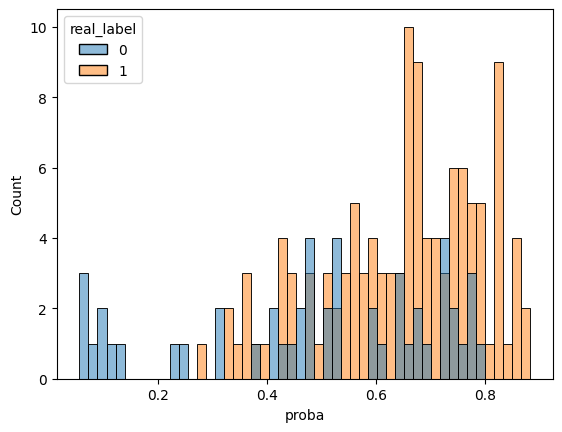

In [38]:
sns.histplot(data=probs_vs_labels, x='proba', hue='real_label', bins=50)

<Axes: xlabel='proba', ylabel='Density'>

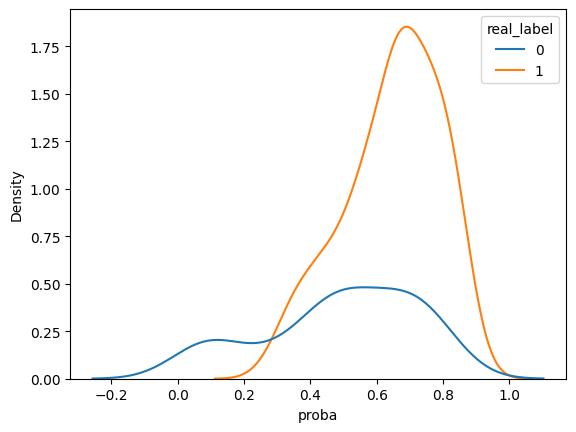

In [39]:
sns.kdeplot(data=probs_vs_labels, x='proba', hue='real_label')

### KLOD validation2 (200)  - zbalansowany

In [40]:
import pickle
# Load back from pickle
with open("KLOD_validation2_200_embeddings_all-mpnet-base-v2.pkl", "rb") as f:
    loaded_data = pickle.load(f)

X_chat = loaded_data['embeddings']   # embeddings
y_chat = loaded_data['fake']       # labels

In [47]:
y_pred_probs = model.predict(X_chat)
y_pred = (y_pred_probs > 0.5).astype("int32")


accuracy = accuracy_score(y_chat, y_pred)
print('Accuracy:', accuracy)
precision = precision_score(y_chat, y_pred)
print('Precision', precision)

print('Confusion matrix:')
print(confusion_matrix(y_chat, y_pred))

print(classification_report(y_chat,y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.6559633027522935
Precision 0.6233766233766234
Confusion matrix:
[[47 58]
 [17 96]]
              precision    recall  f1-score   support

           0       0.73      0.45      0.56       105
           1       0.62      0.85      0.72       113

    accuracy                           0.66       218
   macro avg       0.68      0.65      0.64       218
weighted avg       0.68      0.66      0.64       218



In [42]:
probs_vs_labels = pd.DataFrame({'proba':y_pred_probs[:,0], 'real_label':y_chat})

<Axes: xlabel='proba', ylabel='Count'>

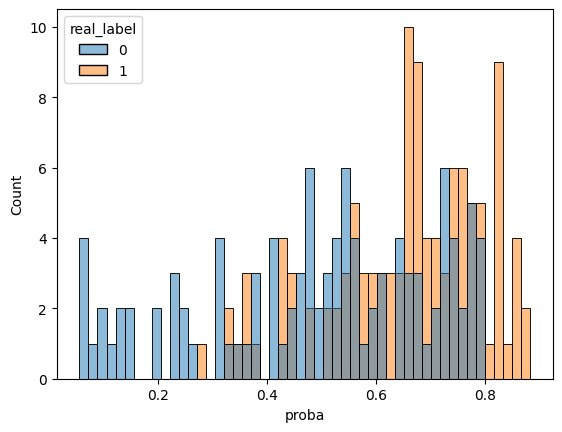

In [43]:
sns.histplot(data=probs_vs_labels, x='proba', hue='real_label', bins=50)

<Axes: xlabel='proba', ylabel='Density'>

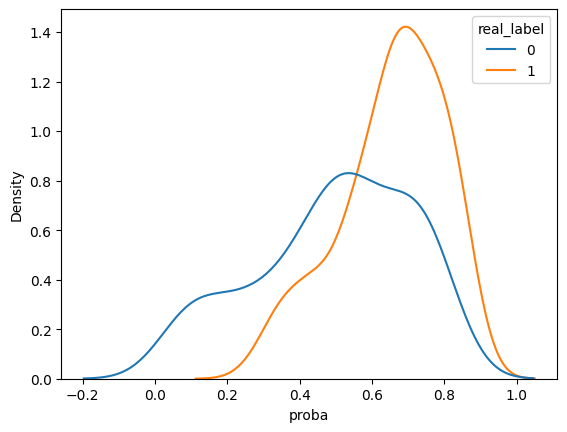

In [44]:
sns.kdeplot(data=probs_vs_labels, x='proba', hue='real_label')